Note: Use this template to develop your project. Do not change the steps. For each step, you may add additional cells if needed.

#### Group Information

Group No: Derma_2

- Member 1: MOHAMAD NAZMI BIN HASHIM
- Member 2: MIOR MUHAMMAD IRFAN BIN MIOR LATFEE
- Member 3: MUHAMMAD HAIQAL BIN RAFIQUZZAMAN
- Member 4: MUHAMMAD KHAWARIZMI BIN JEFRI

#### Import Libraries

In [1]:
# This line serves as a configuration option for Jupyter Notebook's Jedi autocomplete library
%config Completer.use_jedi=False

# This lines imports NumPy library that is used to support effective numerical operations and arrays in Python
import numpy as np 

#This line imports the Pandas library, which provides data manipulation and analysis tools in Python
import pandas as pd

# This line imports the pyplot module from the Matplotlib library, that is used create 
# various types of plots and visualizations.
import matplotlib.pyplot as plt

#### Load the dataset

In [2]:
# Load the dataset to enable the data can be worked with
# read data from a csv file
dataset = pd.read_csv('assignment1_dataset.csv')

In [3]:
# To retrieve the data in the first five rows
dataset.head(5)

,f1,f2,f3,f4,f5,response
0,-0.764216,-1.016209,0.149410,-0.050119,-0.578127,6.242514
1,0.763880,-1.159509,-0.721492,-0.654067,-0.431670,-8.118241
2,0.519329,-0.664621,-1.694904,1.339779,0.182764,66.722455
3,-0.177388,0.515623,0.135144,-0.647634,-0.405631,-27.716793
4,0.104022,0.749665,-0.939338,-0.090725,-0.639963,8.192075


In [4]:
# To retrieve the data in the last five rows
dataset.tail(5)

,f1,f2,f3,f4,f5,response
995,-0.310133,0.529274,-1.439255,0.724974,0.430063,35.181828
996,-0.731895,-0.223302,-1.228191,-2.034934,0.509077,-70.134876
997,0.343181,0.431241,-0.054715,0.945423,-2.474684,42.925478
998,0.391021,0.494147,0.106403,-0.652278,-0.200139,-13.287862
999,-0.376168,-0.054266,-0.880176,-0.334246,-0.043447,-6.829767


In [5]:
# Get the quick overview of the data distribution and the dain insights about dataset
dataset.describe()

,f1,f2,f3,f4,f5,response
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.012255,-0.043030,-0.065785,0.039616,0.008074,11.229435
std,0.998816,1.042413,0.982640,1.023960,1.006679,40.028188
min,-3.174809,-3.381691,-3.158010,-2.764936,-2.946633,-103.044475
25%,-0.655282,-0.759477,-0.734505,-0.660802,-0.685371,-16.580272
50%,-0.001177,-0.038444,-0.049838,-0.006831,-0.000368,10.554227
75%,0.697331,0.696343,0.591642,0.737806,0.710398,38.485118
max,3.092866,3.534175,3.406115,3.145835,3.007734,157.890314


#### Define the loss function

In [29]:
def loss_fn(y, yhat):
    """ Pass two arguments
    Arguments:
        y: responses
        yhat: predicted value
    Returns:
        loss: loss value
    """
    #calculate the mean squared error for the loss value
    #loss = ((y - yhat)**2).mean()
    
    #calculate the mean absolute error for the loss value
    error = yhat - y
    absolute_error = np.absolute(error)
    total_absolute_error = np.sum(absolute_error)
    loss = total_absolute_error/y.size
    
    
    return loss

#### Define function to perform prediction

In [30]:
def predict(w,x):
    """ Pass two arguments
    Arguments:
        w: weights
        X: input features
    Returns:
        yhat: predicted values
    """
    
    yhat = x.dot(w)
   
    return yhat

#### Define function for model training
Display the training loss value for each epoch of the training loop. The displayed value must be in 3 decimal places.

In [36]:
def train_model(X, y, alpha, max_epoch):
    """ Pass four arguments
    Arguments:
        X: input features
        y: responses
        alpha: learning rate
        max_epoch: maximum epochs
    Returns:
        w: estimated weights
        hist_loss: training loss history
    """
    
    # Multivariate Linear Regression using Gradient Descent
    n = X.shape[1] # get number of columns for X
    w = np.ones(n) # set the number of number of weights from n
    yhat = predict(w,X) # Calculate hypothesis using formula
    hist_loss = []

    # Gradient descent algorithm
    hist_loss = np.ones(max_epoch)
    for i in range (0, max_epoch):
        w[0] = w[0] - (alpha / X.shape[0]) * sum(yhat-y)
        for j in range(1, n) :
            w[j] = w[j] - (alpha/ X.shape[0]) * sum((yhat-y) * X[:, j])
        yhat = predict(w,X)
        hist_loss[i] = loss_fn(y, yhat) #call the loss_fn function
        print(f"Epoch {i+1}: Loss = {hist_loss[i]:.3f}") #display loss value for each epoch

    

    return w, hist_loss

#### Split the dataset
The ratio of training and test is 8:2.

In [9]:
# Scikit-learn provides a tool called train_test_split that assists in dividing 
# a dataset into training and testing subsets. 

from sklearn.model_selection import train_test_split

In [10]:
# This line selects all the rows of the dataset and all columns except the last column
X = dataset.iloc[:, :-1] #assigning features to a variable

# This line selects all the rows of the dataset and only the last column
y = dataset.iloc[:, -1]  #assigning target to a variable

In [11]:
m = X.shape[0] # number of samples =1000 rows
ones =np.ones((m,1))
X = np. concatenate((ones, X), axis=1) # Nuw x with X0's =1

In [12]:
# Split the dataset 
# Note: Random state is used to split the same row constantly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [13]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [35]:
#Display number of rows and columns for the datasets
print('The shape of train set: ')
print('X_train set: ', X_train.shape, '\ny_train set: ', y_train.shape)
print('')
print('The shape of test set: ')
print('X_test set: ', X_test.shape, '\ny_test set: ', y_test.shape)

The shape of train set: 
X_train set:  (800, 6) 
y_train set:  (800,)

The shape of test set: 
X_test set:  (200, 6) 
y_test set:  (200,)


#### Train the model

In [32]:
alpha = 0.1
max_epoch = 100
w, hist_loss = train_model(X_train, y_train, alpha, max_epoch)

Epoch 1: Loss = 28.665
Epoch 2: Loss = 25.681
Epoch 3: Loss = 23.018
Epoch 4: Loss = 20.645
Epoch 5: Loss = 18.538
Epoch 6: Loss = 16.664
Epoch 7: Loss = 14.999
Epoch 8: Loss = 13.522
Epoch 9: Loss = 12.221
Epoch 10: Loss = 11.071
Epoch 11: Loss = 10.059
Epoch 12: Loss = 9.164
Epoch 13: Loss = 8.385
Epoch 14: Loss = 7.708
Epoch 15: Loss = 7.117
Epoch 16: Loss = 6.605
Epoch 17: Loss = 6.164
Epoch 18: Loss = 5.785
Epoch 19: Loss = 5.460
Epoch 20: Loss = 5.189
Epoch 21: Loss = 4.969
Epoch 22: Loss = 4.785
Epoch 23: Loss = 4.627
Epoch 24: Loss = 4.494
Epoch 25: Loss = 4.391
Epoch 26: Loss = 4.307
Epoch 27: Loss = 4.242
Epoch 28: Loss = 4.187
Epoch 29: Loss = 4.144
Epoch 30: Loss = 4.110
Epoch 31: Loss = 4.084
Epoch 32: Loss = 4.064
Epoch 33: Loss = 4.048
Epoch 34: Loss = 4.037
Epoch 35: Loss = 4.029
Epoch 36: Loss = 4.024
Epoch 37: Loss = 4.020
Epoch 38: Loss = 4.017
Epoch 39: Loss = 4.015
Epoch 40: Loss = 4.014
Epoch 41: Loss = 4.013
Epoch 42: Loss = 4.012
Epoch 43: Loss = 4.012
Epoch 44:

#### Display the estimated weights

In [33]:
# This section will print the estimated weight that are already calculated from train_model fuunction

print("Estimated weights:")
for i, weight in enumerate(w):
    print(f"The estimated weight of w{i} is: {weight:}")

Estimated weights:
The estimated weight of w0 is: 9.54428361814229
The estimated weight of w1 is: 11.748065838643976
The estimated weight of w2 is: -0.07326348667363941
The estimated weight of w3 is: 0.10474282998248938
The estimated weight of w4 is: 36.972189660534845
The estimated weight of w5 is: 0.03440591685751843


#### Display the training loss against epoch graph

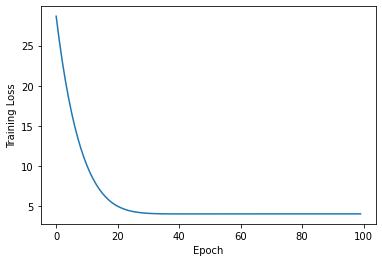

In [34]:
# Plot the training loss against epoch
plt.plot(range(max_epoch), hist_loss)
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.show()

The graph training loss against epoch shows that the trainig loss starting to decline when the number of epoch is increasing. From the observation regarding the graph above, the initial loss is the highest one because the optimization algorithm, which is gradient descent is not carried out yet at first place. After the algorithm iteratively updates the model's parameter based on the training data, the model steadily improves its predictions which lower the training loss from time to time. 

Basically, the gradient descent, the optimization algorithm will the find the optimal parameters that will minimize the difference between the target outputs' predicted and actual values. This goal can be achieved when the algorithm repeatedly adjusting the parameter in each epoch and manages to decrease the loss.

When the number of epoch increases, the model are provided with more oppurtunities to learn and finding the best parameters from the training data. As a result, the training loss will be gradually decreases until it reaches a point where further iterations do not significantly improve the model's performance. For example, the graph above shows that the training loss started to maintain its value and there are no trend of fluctuate in the data. Based on the result above, the relationship between the number of epochs and the training loss may not always be strictly decreasing but the overall trend is typically a decline in the loss as the number of epochs increases.

#### Predict the test set

In [18]:
# Calculate the test loss using the estimated weights
yhat_test = predict(w, X_test)
test_loss = loss_fn(y_test, yhat_test)
print("Test loss:", test_loss)

Test loss: 4.111794879906295


#### Display the r2 score, mean squared error and mean absolute error

In [19]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [20]:
# Calculate the test set performance metrics
r_squared = r2_score(y_test, yhat_test)
mse = mean_squared_error(y_test, yhat_test)
mae = mean_absolute_error(y_test, yhat_test)

# Display the performance metrics
print("Test set R-squared:", r_squared)
print("Test set MSE:", mse)
print("Test set MAE:", mae)

Test set R-squared: 0.9834333413966764
Test set MSE: 27.294250357419305
Test set MAE: 4.111794879906295


In [ ]:
# Thank you and have a nice day.